# Automatic grouping of places based on similarity criteria given a certain location
Using [Yelp Open Dataset](https://www.yelp.com/dataset) business, tip and checkin datasets, this task will group places based on similarity criteria given a certain location. Go ahead to learn more about it.

### Used libraries
[Pandas](https://pandas.pydata.org/): most common, open source data analysis and manipulation tool.

[NumPy](https://numpy.org/): used for mathematical support for some processes.

### Preprocessing dataset
All preprocessing task is done by our `preprocessing_business_dataset.ipynb`. See it to learn more about preprocessing.

In [1]:
import pandas as pd
import numpy as np

from utils.algorithm import score_plot_and_get_best
from utils.algorithm import add_new_column

In [2]:
df_business = pd.read_csv('../dataset/df_business_final.csv')

In [3]:
print(df_business.shape)
df_business.head(5)

(150346, 66)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,stars,state,street,touristy,trendy,upscale,valet,vegan,vegetarian,video
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,MO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filter dataset by city
This function filters dataset by city feature. In this case we hardcoded Tucson city.

In [4]:
def filter_by_city(city, df):
    return df[df['city'].str.contains(city) == True]

In [5]:
df_business_filtered = filter_by_city('Tucson', df_business)

In [6]:
print(df_business_filtered.shape)

df_business_filtered.head(5)

(9262, 66)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,stars,state,street,touristy,trendy,upscale,valet,vegan,vegetarian,video
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Drop non number features
K-Means algorithm wants only numerical features, so we dropped string features as:
- business_id
- address
- categories
- city
- latitude
- longitude
- name
- state
- postal_code

These features will be retrieved after clustering.

In [7]:
to_drop = ['business_id', 'address', 'categories', 'city', 'latitude', 'longitude', 'name', 'state', 'postal_code']

df_business_filtered_dropped = df_business_filtered.drop(to_drop, axis=1)

In [8]:
df_business_filtered_dropped.shape

(9262, 57)

# K-Means
Check `users_task.ipynb` for K-Means explaination

In [9]:
df_business_dropped_kmeans = df_business_filtered_dropped.copy()

            silhouette_score  calinski_harabasz_score  davies_bouldin_score
n_clusters                                                                 
2                   0.885914             14487.306274              0.461312
3                   0.830901             16650.392603              0.522023
4                   0.804754             20308.663241              0.498188
5                   0.766183             23825.632990              0.500291
6                   0.734635             29066.851550              0.486245
7                   0.668330             31968.289435              0.505434
8                   0.678475             35737.176352              0.510760
9                   0.638435             39410.268576              0.459446
10                  0.646187             44592.833145              0.459804
11                  0.624385             48033.276817              0.472329
12                  0.625820             54206.228677              0.457789
13          

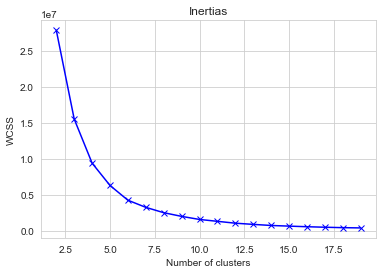

In [10]:
df_cluster_kmeans = score_plot_and_get_best(df_business_dropped_kmeans, "kmeans", np.arange(2, 20))

In [11]:
df_business_merged_dropped_kmeans = add_new_column('kmeans', df_cluster_kmeans, df_business_dropped_kmeans)
df_business_merged_dropped_kmeans.shape

(9262, 58)

### Reset index

In [12]:
df_business_merged_dropped_kmeans = df_business_merged_dropped_kmeans.reset_index(drop=True)
df_business_filtered = df_business_filtered.reset_index(drop=True)

### Reintegrate dropped features
Here we reintegrate previously dropped features in order to export dataset correctly.

In [13]:
df_business_filtered_dropped_merged_kmeans = df_business_merged_dropped_kmeans.join(df_business_filtered[to_drop])
print(df_business_filtered_dropped_merged_kmeans.shape)
df_business_filtered_dropped_merged_kmeans.head(5)

(9262, 67)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,cluster,business_id,address,categories,city,latitude,longitude,name,state,postal_code
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,tUFrWirKiKi_TAnsVWINQQ,5255 E Broadway Blvd,"Department Stores, Shopping, Fashion, Home & G...",Tucson,32.223236,-110.880452,Target,AZ,85711
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7,rBmpy_Y1UbBx8ggHlyb7hA,625 N Stone Ave,"Automotive, Auto Parts & Supplies, Auto Custom...",Tucson,32.229872,-110.972342,Arizona Truck Outfitters,AZ,85705
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,wghnIlMb_i5U46HMBGx9ig,"1625 W Valencia Rd, Ste 101-103","Restaurants, Chinese",Tucson,32.132305,-110.999985,China Dragon Restaurant,AZ,85746
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,txyXRytGjwOXvS8s4sc-WA,1070 E Tucson Marketplace Blvd,"Vitamins & Supplements, Ice Cream & Frozen Yog...",Tucson,32.186794,-110.954765,Smoothie King,AZ,85713
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7,eYxGFkxo6m3SYGVTh5m2nQ,4158 E Grant Rd,"Towing, Hotels & Travel, Automotive, Motorcycl...",Tucson,32.250324,-110.903655,Big Boyz Toyz Motorcycle Rentals,AZ,85712


### Export clustered with kmeans df

In [14]:
df_business_filtered_dropped_merged_kmeans.to_csv(
    r'../dataset/df_business_filtered_by_city_kmeans.csv', index=False)

# DBSCAN algorithm
Check `users_task.ipynb` for DBSCAN algorithm explaination

In [15]:
from utils.algorithm import get_distances_and_plot
from utils.algorithm import remove_duplicates
from utils.algorithm import filter_distances_and_plot

In [16]:
df_business_dropped_dbscan = df_business_filtered_dropped.copy()

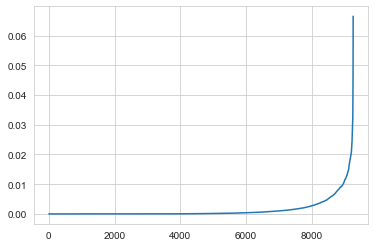

In [17]:
distances = get_distances_and_plot(df_business_dropped_dbscan)

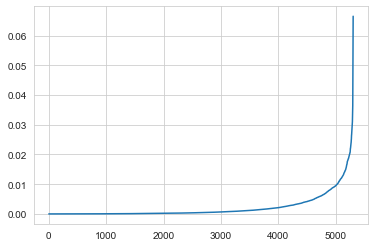

In [18]:
distances = remove_duplicates(distances)

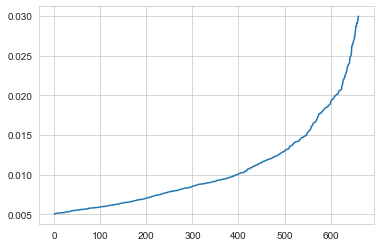

In [19]:
distances = filter_distances_and_plot(distances, 0.03, 0.005);

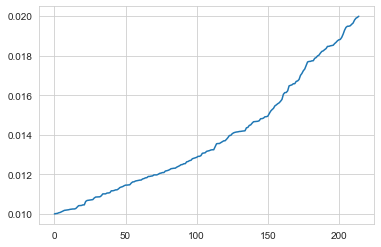

In [20]:
distances = filter_distances_and_plot(distances, 0.020, 0.010);

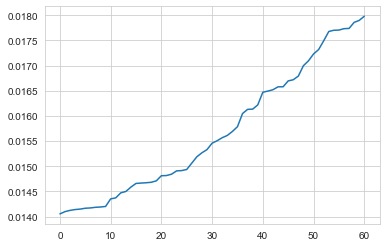

In [21]:
distances = filter_distances_and_plot(distances, 0.018, 0.014);

In [22]:
df_eps_dbscan = score_plot_and_get_best(df_business_dropped_dbscan, "dbscan", distances)

          silhouette_score  calinski_harabasz_score  davies_bouldin_score
eps                                                                      
0.014054         -0.419594                 3.456824              1.180245
0.014099         -0.419594                 3.456824              1.180245
0.014124         -0.419594                 3.456824              1.180245
0.014141         -0.419594                 3.456824              1.180245
0.014150         -0.419594                 3.456824              1.180245
...                    ...                      ...                   ...
0.017732         -0.419594                 3.456824              1.180245
0.017737         -0.419594                 3.456824              1.180245
0.017857         -0.419594                 3.456824              1.180245
0.017896         -0.419594                 3.456824              1.180245
0.017979         -0.419594                 3.456824              1.180245

[61 rows x 3 columns]
Best  eps : 0.0

In [23]:
df_business_merged_dropped_dbscan = add_new_column('dbscan', df_eps_dbscan, df_business_dropped_dbscan)
print("Best DBSCAN number of cluster: ", len(df_business_merged_dropped_dbscan['eps'].unique()))

Best DBSCAN number of cluster:  71


### Reset index

In [24]:
df_business_merged_dropped_dbscan = df_business_merged_dropped_dbscan.reset_index(drop=True)
df_business_filtered = df_business_filtered.reset_index(drop=True)

### Re-integrate dropped features
Here we reintegrate previously dropped features in order to export dataset correctly.

In [25]:
df_business_filtered_dropped_merged_dbscan = df_business_merged_dropped_dbscan.join(df_business_filtered[to_drop])
print(df_business_filtered_dropped_merged_dbscan.shape)
df_business_filtered_dropped_merged_dbscan.head(5)

(9262, 67)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,eps,business_id,address,categories,city,latitude,longitude,name,state,postal_code
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,tUFrWirKiKi_TAnsVWINQQ,5255 E Broadway Blvd,"Department Stores, Shopping, Fashion, Home & G...",Tucson,32.223236,-110.880452,Target,AZ,85711
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,rBmpy_Y1UbBx8ggHlyb7hA,625 N Stone Ave,"Automotive, Auto Parts & Supplies, Auto Custom...",Tucson,32.229872,-110.972342,Arizona Truck Outfitters,AZ,85705
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,wghnIlMb_i5U46HMBGx9ig,"1625 W Valencia Rd, Ste 101-103","Restaurants, Chinese",Tucson,32.132305,-110.999985,China Dragon Restaurant,AZ,85746
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,txyXRytGjwOXvS8s4sc-WA,1070 E Tucson Marketplace Blvd,"Vitamins & Supplements, Ice Cream & Frozen Yog...",Tucson,32.186794,-110.954765,Smoothie King,AZ,85713
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,eYxGFkxo6m3SYGVTh5m2nQ,4158 E Grant Rd,"Towing, Hotels & Travel, Automotive, Motorcycl...",Tucson,32.250324,-110.903655,Big Boyz Toyz Motorcycle Rentals,AZ,85712


### Export clustered with dbscan df


In [26]:
df_business_filtered_dropped_merged_dbscan.to_csv(
    r'../dataset/df_business_filtered_by_city_dbscan.csv', index=False)